# Sources of Variability

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(pwr))

Warning message:
“package ‘dplyr’ was built under R version 3.4.1”

In [2]:
options(repr.plot.width=4, repr.plot.height=3)

## Introduction to Linear Regression in R

In [52]:
n <- 10
a <- 10
b <- -1
x <- 1:n
mu <- a + b*x
sigma <- 1
y <- rnorm(n, mu, sigma)
df <- data.frame(x=x, y=y)

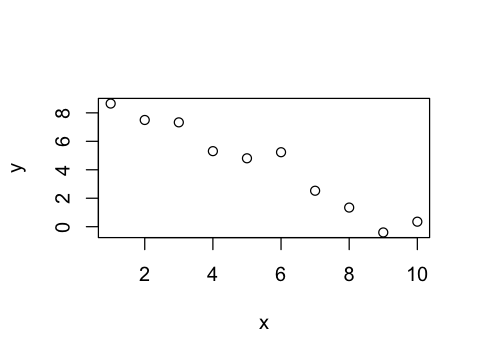

In [53]:
plot(x, y)

In [66]:
fit1 <- lm(y ~ 1, data=df)
summary(fit1)


Call:
lm(formula = y ~ 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6695 -2.6253  0.7549  2.5610  4.3881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    4.265      1.001   4.263   0.0021 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.164 on 9 degrees of freedom


In [67]:
plot(x, y)
abline(fit1, col='red')

In [74]:
fit2 <- lm(y ~ x + 1, data=df)
summary(fit2)


Call:
lm(formula = y ~ x + 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1082 -0.3648 -0.2014  0.4003  1.4770 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.86178    0.52310   18.85 6.48e-08 ***
x           -1.01753    0.08431  -12.07 2.05e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7657 on 8 degrees of freedom
Multiple R-squared:  0.9479,	Adjusted R-squared:  0.9414 
F-statistic: 145.7 on 1 and 8 DF,  p-value: 2.051e-06


In [75]:
plot(x, y)
abline(fit2, col='red')

## Rails data

In [10]:
suppressPackageStartupMessages(library(nlme))

In [11]:
head(Rail)

Rail travel
1 1    55    
2 1    53    
3 1    54    
4 2    26    
5 2    37    
6 2    32

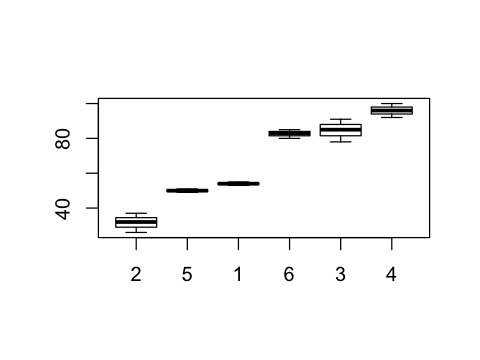

In [95]:
plot(Rail$Rail, Rail$travel)

## Linear model

In [76]:
fit.lm <- lm(travel ~ 1, data = Rail)
summary(fit.lm)


Call:
lm(formula = travel ~ 1, data = Rail)

Residuals:
   Min     1Q Median     3Q    Max 
-40.50 -16.25   0.00  18.50  33.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   66.500      5.573   11.93  1.1e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.65 on 17 degrees of freedom


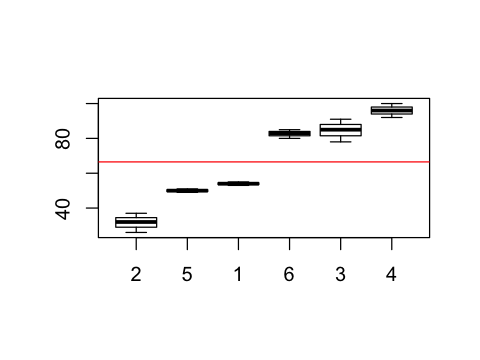

In [96]:
plot(Rail$Rail, Rail$travel)
abline(fit.lm, col='red')

## Linear mixed effects model

In [78]:
fit.lme <- lme(travel ~ 1, random = ~ 1 | Rail, data = Rail)
fit.lme

Linear mixed-effects model fit by REML
  Data: Rail 
  Log-restricted-likelihood: -61.0885
  Fixed: travel ~ 1 
(Intercept) 
       66.5 

Random effects:
 Formula: ~1 | Rail
        (Intercept) Residual
StdDev:    24.80547 4.020779

Number of Observations: 18
Number of Groups: 6 

In [91]:
fit.lme$coefficients$fixed 

(Intercept) 
       66.5

In [94]:
fit.lme$coefficients$random$Rail

(Intercept)
2 -34.53091  
5 -16.35675  
1 -12.39148  
6  16.02631  
3  18.00894  
4  29.24388

In [98]:
intercepts <- fit.lme$coefficients$fixed + fit.lme$coefficients$random$Rail

In [100]:
intercepts

(Intercept)
2 31.96909   
5 50.14325   
1 54.10852   
6 82.52631   
3 84.50894   
4 95.74388

## Example 1 from lecture

- Model
    - $Y_{ij} = μ + b_{i} +ε_{ij}$
    - μ=0
    - $\sigma_e$ = 0.25
    - $\sigma_b$ = 0.5

- Simulation outline
    1. Simulate a data set
    2. Test H0 : μ = 0 ignoring the random effect (save P-value) 
    3. Test H0 : μ = 0 accounting for the random effect (save P-value)

- Repeat the three steps 999 additional times
- Given that the true μ = 0 (by design), we would expect 50 of these P-values to be less than 0.05
- Why?

### Simulate a data set

In [235]:
n.groups <- 6
n.samples <- 3
mu <- 0
sigma.b <- 0.5
sigma.e <- 0.25
x <- rep(1:n.groups, each=n.samples)
b <- rep(rnorm(n.groups, 0, sigma.b), each=n.samples)
eps <- rnorm(n.groups * n.samples, 0, sigma.e)
y <- mu + b + eps
df <- data.frame(x=as.factor(x), y=y)

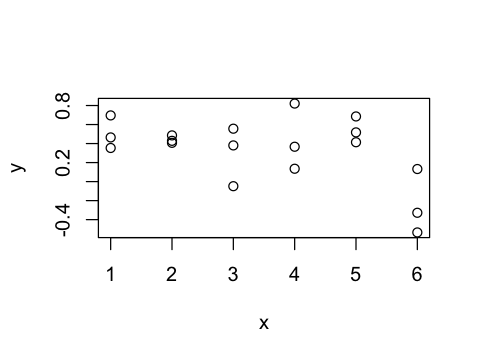

In [236]:
plot(x,y)

### Test H0: μ = 0 ignoring the random effect

In [237]:
fit.lm <- lm(y ~ 1, data = df)

In [238]:
p <- summary(fit.lm)$coefficients[[4]]

In [239]:
p

[1] 0.0008857203

### Wrap steps into a function for convenience

In [241]:
sim.1 <- function(mu, n.groups, n.samples, sigma.e, sigma.b) {
    x <- rep(1:n.groups, each=n.samples)
    b <- rep(rnorm(n.groups, 0, sigma.b), each=n.samples)
    eps <- rnorm(n.groups * n.samples, 0, sigma.e)
    y <- mu + b + eps
    df <- data.frame(x=as.factor(x), y=y)    
    fit.lm <- lm(y ~ 1, data = df)
    p <- summary(fit.lm)$coefficients[[4]]
    p
}

### Find type 1 error by running simulation many times

In [242]:
reps <- 1000
ps <- replicate(reps, sim.1(mu, n.groups, n.samples, sigma.e, sigma.b))

In [243]:
mean(ps < 0.05)

[1] 0.253

**Exercise 1**

Find the Type 1 error with H0 : μ = 0 accounting for the random effect using 1,000 simulation runs and the same parameters as above. 

**Exercise 2**

Plot the QQ-plot of p-values against the uniform distribution for both the fixed and mixed effects models.

**Exercise 3**

Repeat the exercise with a larger sample size of 50 groups of 3.

**Exercise 4**

Do the simulation for Example 2 from the lectures.

- Now consider the two-sample problem we have previously considered with a twist
- Question: Does treatment alter the distribution of the RNA level of a given gene?
- Assumptions:
    - the RNA level for the untreated group follows a normal distribution with mean μ0 and variance 
    - The RNA level for the treated group follows a normal distribution with mean μ1 and variance σ2
- Sample n units from each treatments in replicates of 3
- Apply the two-sample t-test which does not account for the clustering
- Find the empirical type I error when there is no clustering effect